In [1]:
%load_ext Cython
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Final
import numpy as np

# NUM_REGISTROS: Final[int] = 4.5 * 10**9
NUM_REGISTROS: Final[int] = 1 * 10**9
ARRAY_NUMEROS = np.arange(NUM_REGISTROS, dtype=np.uint32)

print(f"{ARRAY_NUMEROS.size = :,}")

ARRAY_NUMEROS.size = 1,000,000,000


In [3]:
%%cython
cimport cython
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
cpdef unsigned long get_max_value(unsigned long[:] array):
    cdef Py_ssize_t index
    cdef Py_ssize_t array_size = array.size
    cdef unsigned long max_value = array[0]
    
    for index in range(1, array_size):
        if array[index] > max_value:
            max_value = array[index]
        
    return max_value

In [4]:
from src import get_max_value_C

In [5]:
get_max_value_C(ARRAY_NUMEROS)

999999999

In [6]:
np.max(ARRAY_NUMEROS) == get_max_value_C(ARRAY_NUMEROS)

np.True_

In [7]:
# # Cython (Função em C)
# %timeit -p 5 get_max_value_C(ARRAY_NUMEROS)

# # Usando Numpy
# %timeit -p 5 np.max(ARRAY_NUMEROS)

# # Cython (Jupyter)
# %timeit -p 5 get_max_value(ARRAY_NUMEROS)

# # Implementação padrão
# %timeit -p 5 max(ARRAY_NUMEROS)

In [8]:
# Cython (Função em C)
%timeit -r 1 -p 5 get_max_value_C(ARRAY_NUMEROS)
# Usando Numpy
%timeit -r 1 -p 5 np.max(ARRAY_NUMEROS)

402.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
429.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
import timeit

tempos_get_max_value_C = timeit.repeat(
    "get_max_value_C(ARRAY_NUMEROS)",
    globals=globals(),
    repeat=100,
    number=1,
)


In [10]:
import pandas as pd

pd.DataFrame(tempos_get_max_value_C).describe()

,0
count,100.000000
mean,0.311690
std,0.007870
min,0.303687
25%,0.307670
50%,0.309861
75%,0.312475
max,0.355789


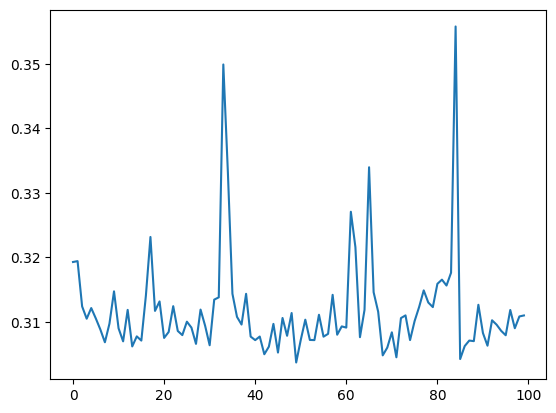

In [11]:
import matplotlib.pyplot as plt

plt.plot(tempos_get_max_value_C)

<Axes: >

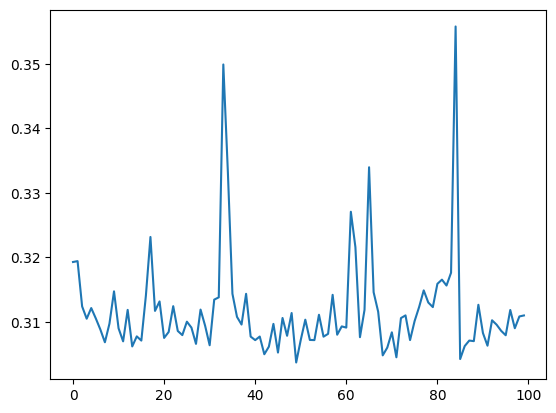

In [12]:
import seaborn as sns

sns.lineplot(
    tempos_get_max_value_C,
)